# Loading Datasets



In [94]:

import warnings
warnings.simplefilter('ignore')
import itertools
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#1st data set#
cc_info = pd.read_csv('cc_info1.csv')
cc_info.head()


,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [95]:
cc_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
credit_card          984 non-null int64
city                 984 non-null object
state                984 non-null object
zipcode              984 non-null int64
credit_card_limit    984 non-null int64
dtypes: int64(3), object(2)
memory usage: 38.5+ KB


In [96]:
#2nd data set#
trns = pd.read_csv('transactions.csv',parse_dates = ['date'])
trns.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


In [97]:
trns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 5 columns):
credit_card                  294588 non-null int64
date                         294588 non-null datetime64[ns]
transaction_dollar_amount    294588 non-null float64
Long                         294588 non-null float64
Lat                          294588 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 11.2 MB


### MERGING DATASETS 

In [98]:
merged = pd.merge( left = trns , right = cc_info, on = 'credit_card', how = 'left')
merged.head()

,credit_card,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,Houston,PA,15342,20000
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,Houston,PA,15342,20000
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,Houston,PA,15342,20000
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,Houston,PA,15342,20000
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,Houston,PA,15342,20000


In [99]:
merged['credit_card'].value_counts().nlargest(20)

2239759218122779    667
3015736744626726    657
5059189477453448    655
3824313030996787    653
4569281393242605    653
7769265222348528    651
2216132730528773    636
5293204730208718    633
3276369883343727    631
1144894232607400    630
4281752431928501    626
6935346241885581    626
7874281252875041    626
3410360221015707    623
6780209767452752    622
2015751582522409    620
8152578549627680    620
7180893798762595    619
5644143320838397    617
8702495698901225    616
Name: credit_card, dtype: int64

In [100]:
#Now we need to extract months, day and year out of date column
merged['month'] = merged['date'].apply(lambda x:x.month)
merged['day'] = merged['date'].apply(lambda x:x.day)
merged['weekday'] = merged['date'].apply(lambda x:x.dayofweek)
merged['hour'] = merged['date'].apply(lambda x:x.hour)


merged = merged.drop(labels = 'date',axis = 1)
merged.head()

,credit_card,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit,month,day,weekday,hour
0,1003715054175576,43.78,-80.174132,40.267370,Houston,PA,15342,20000,9,11,4,0
1,1003715054175576,103.15,-80.194240,40.180114,Houston,PA,15342,20000,10,24,5,22
2,1003715054175576,48.55,-80.211033,40.313004,Houston,PA,15342,20000,10,26,0,18
3,1003715054175576,136.18,-80.174138,40.290895,Houston,PA,15342,20000,10,22,3,19
4,1003715054175576,71.82,-80.238720,40.166719,Houston,PA,15342,20000,10,26,0,20


In [101]:
df2=merged['credit_card'].groupby(merged['day'])


### Question 1 - Your boss wants to identify those users that in your dataset never went above the monthly credit card limit (calendar month). The goal of this is to automatically increase their limit. Can you send him the list of Ids?

In [102]:

k = merged.groupby(['credit_card','month'])['transaction_dollar_amount'].sum()
a = k.to_frame()

merged2 = pd.merge(left = a , right = cc_info,on = 'credit_card',how = 'right')
#Finding credit cards who have never exceeded their credit card limit 

merged2['sum1'] = (merged2.credit_card_limit < merged2.transaction_dollar_amount) 
merged2.head()

,credit_card,transaction_dollar_amount,city,state,zipcode,credit_card_limit,sum1
0,1003715054175576,162.56,Houston,PA,15342,20000,False
1,1003715054175576,8441.51,Houston,PA,15342,20000,False
2,1003715054175576,11281.56,Houston,PA,15342,20000,False
3,1003715054175576,8954.21,Houston,PA,15342,20000,False
4,1013870087888817,281.43,Washington,NH,3280,15000,False


In [103]:
def boolean_to_int(df):
    df['sum1'] = (df['sum1']==True).astype(int)
    df['sum1'] = (df['sum1']==False).astype(int)
    a=df.groupby(['credit_card'])['sum1'].sum().to_frame()
    k = a[a['sum1'] == 0]
    return k.iloc[:,1:] 
    return print('Total credit cards which has never been used beyond credit limit are',len(k.iloc[:,1:]))
 

Required_cards = boolean_to_int(merged2)
Required_cards

""
credit_card
3369600965634913
4462290711836916
6766253113444560
7198750113791865
7324887971716592


In [104]:
Required_cards = boolean_to_int(merged2)
print('Total credit cards which has never been used beyond credit limit are',len(Required_cards))
 
Required_cards

Total credit cards which has never been used beyond credit limit are 862


""
credit_card
1003715054175576
1013870087888817
1023820165155391
1073931538936472
1077622576192810
1087468642191606
1089479586475600
1101164752077181
1107936587129946


### Question 2 )  On the other hand, she wants you to implement an algorithm that as soon as a user goes above her monthly limit, it triggers an alert so that the user can be notified about that. We assume here that at the beginning of the new month, user total money spent gets reset to zero (i.e. she pays the card fully at the end of each month). Build a function that for each day, returns a list of users who went above their credit card monthly limit on that day.

In [105]:
def exceed(data,month,day): 
    ## This function returns a df of credit cards that has exceeded the limit on a given day
    
    data = data[(data['month']==month) & (data['day'] <= day)]
    transaction = data.groupby(['credit_card'])['transaction_dollar_amount'].sum().reset_index()
    limit = data.groupby(['credit_card'])['credit_card_limit'].min().reset_index()
    
    merge = pd.merge(left = transaction , right = limit , on = 'credit_card',how = 'left')
    result = merge[merge['transaction_dollar_amount'] > merge['credit_card_limit']]
    return result

In [106]:
#For example these are the credit cards which has exceeded the limit on 26th of August.

exceed(merged,month=8,day=26)

,credit_card,transaction_dollar_amount,credit_card_limit
51,1460880989446247,20708.32,20000
97,1850995745665541,3116.10,3000
144,2245942585429940,11726.71,10000
158,2366928097135853,15374.54,14000
189,2756688131944353,15337.62,15000
195,2850146878241916,4093.58,4000
197,2891791194252089,5786.23,5000
205,2980539633198204,9319.10,7000
236,3264419298955673,4062.62,4000
239,3281814060807145,4579.05,4000


## Question 3


### Finally, your boss is very concerned about frauds cause they are a huge cost for credit card companies. She wants you to implement an unsupervised algorithm that returns all transactions that seem unusual and are worth being investigated further.

In [107]:
merged.head()

,credit_card,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit,month,day,weekday,hour
0,1003715054175576,43.78,-80.174132,40.267370,Houston,PA,15342,20000,9,11,4,0
1,1003715054175576,103.15,-80.194240,40.180114,Houston,PA,15342,20000,10,24,5,22
2,1003715054175576,48.55,-80.211033,40.313004,Houston,PA,15342,20000,10,26,0,18
3,1003715054175576,136.18,-80.174138,40.290895,Houston,PA,15342,20000,10,22,3,19
4,1003715054175576,71.82,-80.238720,40.166719,Houston,PA,15342,20000,10,26,0,20


In [108]:
address = merged.groupby(['credit_card'])['Long','Lat'].mean().reset_index()
address = address.rename(columns = {'Long' : 'Long_H','Lat':'Lat_H'})
data = pd.merge(left = merged, right = address , on = 'credit_card',how = 'left')
data['distance'] = np.sqrt((data['Long'] - data['Long_H'])**2 + (data['Lat'] - data['Lat_H'])**2)
data.head()

,credit_card,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit,month,day,weekday,hour,Long_H,Lat_H,distance
0,1003715054175576,43.78,-80.174132,40.267370,Houston,PA,15342,20000,9,11,4,0,-77.583829,39.610299,2.672342
1,1003715054175576,103.15,-80.194240,40.180114,Houston,PA,15342,20000,10,24,5,22,-77.583829,39.610299,2.671878
2,1003715054175576,48.55,-80.211033,40.313004,Houston,PA,15342,20000,10,26,0,18,-77.583829,39.610299,2.719557
3,1003715054175576,136.18,-80.174138,40.290895,Houston,PA,15342,20000,10,22,3,19,-77.583829,39.610299,2.678229
4,1003715054175576,71.82,-80.238720,40.166719,Houston,PA,15342,20000,10,26,0,20,-77.583829,39.610299,2.712572


In [109]:
median = merged.groupby(['credit_card'])['transaction_dollar_amount'].median().reset_index()
median = median.rename(columns = {'transaction_dollar_amount':'transaction_median'})
data1 = pd.merge(left = data , right = median , on = 'credit_card',how = 'left')


In [110]:
data1['transaction_to_median'] = data1['transaction_dollar_amount'] / data1['transaction_median']
data1['transaction_to_limit'] = data1['transaction_dollar_amount']/data1['credit_card_limit']
data1.head()

,credit_card,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit,month,day,weekday,hour,Long_H,Lat_H,distance,transaction_median,transaction_to_median,transaction_to_limit
0,1003715054175576,43.78,-80.174132,40.267370,Houston,PA,15342,20000,9,11,4,0,-77.583829,39.610299,2.672342,93.73,0.467086,0.002189
1,1003715054175576,103.15,-80.194240,40.180114,Houston,PA,15342,20000,10,24,5,22,-77.583829,39.610299,2.671878,93.73,1.100501,0.005158
2,1003715054175576,48.55,-80.211033,40.313004,Houston,PA,15342,20000,10,26,0,18,-77.583829,39.610299,2.719557,93.73,0.517977,0.002427
3,1003715054175576,136.18,-80.174138,40.290895,Houston,PA,15342,20000,10,22,3,19,-77.583829,39.610299,2.678229,93.73,1.452897,0.006809
4,1003715054175576,71.82,-80.238720,40.166719,Houston,PA,15342,20000,10,26,0,20,-77.583829,39.610299,2.712572,93.73,0.766243,0.003591


In [111]:
def cal_percentile(df):
    per = [25,50,75]
    d = np.percentile(df,per)
    return pd.Series(d,index = ['{}%'.format(p) for p in per])

trans_stats = data.groupby('credit_card')['transaction_dollar_amount'].apply(cal_percentile).unstack()

In [112]:
data2 = pd.merge(data1,trans_stats,on = 'credit_card',how = 'left')
data2.head()

,credit_card,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit,month,day,...,hour,Long_H,Lat_H,distance,transaction_median,transaction_to_median,transaction_to_limit,25%,50%,75%
0,1003715054175576,43.78,-80.174132,40.267370,Houston,PA,15342,20000,9,11,...,0,-77.583829,39.610299,2.672342,93.73,0.467086,0.002189,59.01,93.73,124.63
1,1003715054175576,103.15,-80.194240,40.180114,Houston,PA,15342,20000,10,24,...,22,-77.583829,39.610299,2.671878,93.73,1.100501,0.005158,59.01,93.73,124.63
2,1003715054175576,48.55,-80.211033,40.313004,Houston,PA,15342,20000,10,26,...,18,-77.583829,39.610299,2.719557,93.73,0.517977,0.002427,59.01,93.73,124.63
3,1003715054175576,136.18,-80.174138,40.290895,Houston,PA,15342,20000,10,22,...,19,-77.583829,39.610299,2.678229,93.73,1.452897,0.006809,59.01,93.73,124.63
4,1003715054175576,71.82,-80.238720,40.166719,Houston,PA,15342,20000,10,26,...,20,-77.583829,39.610299,2.712572,93.73,0.766243,0.003591,59.01,93.73,124.63


In [113]:
labels = ['transaction_dollar_amount','Long', 'Lat', 'city', 'state', 'zipcode', 'credit_card_limit', 
          'month', 'day', 'Long_H', 'Lat_H', 'transaction_median']
data2 = data2.drop(labels=labels, axis=1)
data2.head()

,credit_card,weekday,hour,distance,transaction_to_median,transaction_to_limit,25%,50%,75%
0,1003715054175576,4,0,2.672342,0.467086,0.002189,59.01,93.73,124.63
1,1003715054175576,5,22,2.671878,1.100501,0.005158,59.01,93.73,124.63
2,1003715054175576,0,18,2.719557,0.517977,0.002427,59.01,93.73,124.63
3,1003715054175576,3,19,2.678229,1.452897,0.006809,59.01,93.73,124.63
4,1003715054175576,0,20,2.712572,0.766243,0.003591,59.01,93.73,124.63


        pc1       pc2
0  1.140284 -0.420704
1  1.145926 -0.134773
2  1.137527 -0.396915
3  1.141949  0.038459
4  1.137787 -0.280373


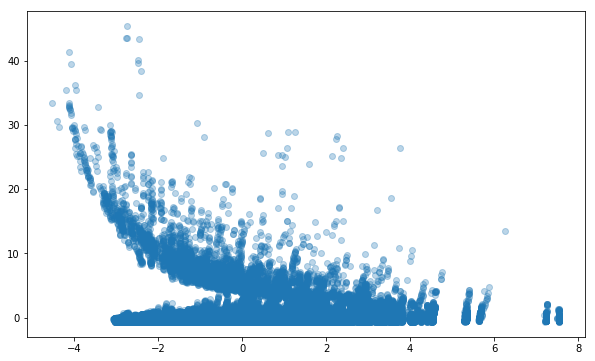

In [114]:
#Normalizing the data
a = data2.drop('credit_card',axis = 1)
scaler = StandardScaler()
norm_x = scaler.fit_transform(a)


#PCA

pca = PCA(n_components = 2)
xd = pca.fit_transform(norm_x)
xd= pd.DataFrame(xd,columns = ['pc1','pc2'])
print(xd.head())
plt.scatter(xd.pc1,xd.pc2,alpha=0.3)

#### We did PCA just to plot different high dimensional data points in a 2 dimensional space without lossing the actual essence of the data
 
 
Here, in the given PCA plot we can clearly see that there are some data points which are considerably away from the rest.This can be a good indication of a probable fraud transaction.


We can further use clustering which is an unsupervised learning algorithm to see what clusters we can get and how those clusters highlight the existence of any outlier .


In [115]:
n_clusters = 6;
kmeans = KMeans(n_clusters ,n_jobs = 1)
kmeans.fit(norm_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [116]:
xd['label']=kmeans.labels_
print(xd.label.value_counts())

0    102152
3     94809
5     50745
1     39525
4      3856
2      3501
Name: label, dtype: int64


Here we can see that cluster 0 and cluster 5 have got very few records when your campare those numbers with cluster 4,2,1 and 3 .So this again can be a potentail outlier or a fradulent transaction.

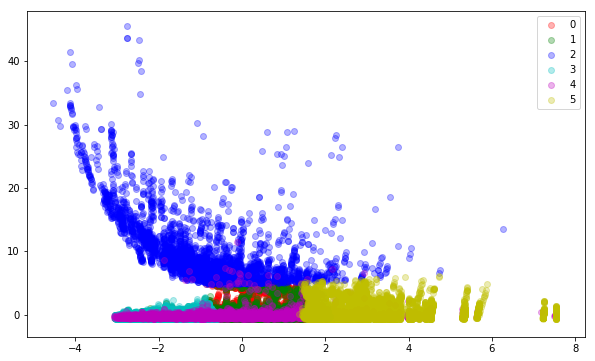

In [117]:
colors = itertools.cycle(['r','g','b','c','m','y','k'])
plt.rc('figure',figsize = (10,6))
for label in range(n_clusters):
    clust_dist = xd.loc[xd.label==label, :]
    plt.scatter(clust_dist.pc1,clust_dist.pc2, c = next(colors),label = label,alpha = 0.3)
plt.legend(loc = 'best')

In [118]:
fraud_label = xd.label.value_counts().argmin()
fraud_label

2

In [119]:
fraud_transaction= data2.loc[xd.label == fraud_label,:]
fraud_transaction.head()

,credit_card,weekday,hour,distance,transaction_to_median,transaction_to_limit,25%,50%,75%
429,1013870087888817,2,19,1.846594,11.094217,0.064842,58.0900,87.67,128.0200
1220,1087468642191606,1,18,0.075115,11.042570,0.283610,51.4600,77.05,113.4500
1223,1087468642191606,4,21,0.080349,12.219208,0.313830,51.4600,77.05,113.4500
1281,1089479586475600,2,23,2.229831,12.497636,0.054330,48.3725,78.25,113.0825
1332,1089479586475600,3,18,2.313859,12.438083,0.054071,48.3725,78.25,113.0825


So here the fraud_transaction dataframe can contain all the potential fraud transaction.